In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import HR_config.wrapper as sweHR
import swe.animation_SWE
from IPython.display import HTML
import numpy as np

# Animation of SSH -------------------------------------------

[xr, h, u, t] = sweHR.swe_KAP(sweHR.Kref * 2, sweHR.amplitude - 1.0, sweHR.period + 1.0)


Computation of href performed w/ following parameters:
- Hauteur eau moyenne =  20
- Amplitude =  5.0
- Periode =  15.0
- Phase =  0


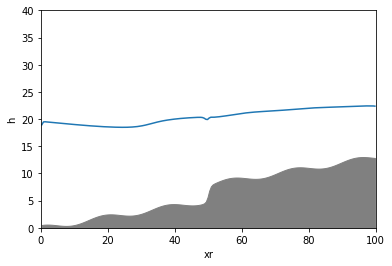

In [2]:
anim = swe.animation_SWE.animate_SWE(xr, [h], sweHR.b, sweHR.D, ylim=[0, 40])
# HTML(anim.to_html5_video())

In [7]:
# Adjoint gradient
J, grad = sweHR.J_KAP(sweHR.Kref, sweHR.amplitude, sweHR.period)
print(f"{J=}")
print(f"{all(grad==0.0)=}")


J=0.0
all(grad==0.0)=True


In [20]:
cost0, gradient0 = sweHR.J_KAP([0], sweHR.amplitude, sweHR.period)
epsilon = 1e-8
cost_eps = sweHR.J_KAP_nograd([epsilon], sweHR.amplitude, sweHR.period)
gradient_finite_diff = (cost_eps - cost0) / epsilon
print(f"Gradient (finite difference): {gradient_finite_diff: >+10.12f}")
print(f"Gradient (adjoint) : {gradient0[0]: >+10.12f}")
print(f"{np.isclose(gradient_finite_diff, gradient0[0])=}")

response, gradient = sweHR.J_KAP_array(
    [
        ([0.1, 0.2, 0.5], 5.0, 15.0),  # Example array to evaluate
        ([0.1, 0.2, 0.5], 5.1, 15.1),  # Dim K = 3
        ([0.1, 0.1, 0.1], 5.0, 15.2),
        ([0.1, 0.1, 0.4], 5.1, 15.0),
        ([0.2, 0.2, 0.5], 5.0, 15.1),
        # ([0.2, 0.2, 0.5], 5.1, 15.2),
        # ([0.6, 0.1, 0.7], 5.0, 15.0),
        # ([0.2, 0.2, 0.5], 5.1, 15.1),
        # ([0.2, 0.2, 0.5], 5.0, 15.2),
        # ([0.1, 0.7, 0.5], 5.1, 15.0),
        # ([0.2, 0.2, 0.2], 5.0, 15.1),
    ],
    idx_to_observe=None,
    hreference=sweHR.href,
    parallel=False,
    ncores=4,
    adj_gradient=True,
)


Gradient (finite difference): -978.112346672333
Gradient (adjoint) : -978.112185182361
np.isclose(gradient_finite_diff, gradient0[0])=True


In [6]:
response, gradient

(array([180.12504956, 225.27376   , 165.63800344, 135.18798213,
        229.3996162 , 354.65317657, 396.4519035 , 218.0510486 ,
        347.2810624 , 354.6490012 ,  72.15881288]),
 array([[  84.1414273 ,  328.0788628 ,  705.46253419],
        [ -90.71581317,  115.65438668,  483.01000595],
        [ -82.74145431,  -29.64577833,   10.37396656],
        [-168.22656318, -135.43925429,  251.6229173 ],
        [ 123.00151094,  397.68350979,  734.261077  ],
        [ -50.13544398,  186.62858161,  517.82505376],
        [ 263.96566381,  489.02677633, 1000.6975695 ],
        [ -52.31427022,  151.89022256,  515.55554184],
        [ 124.58741127,  430.36780478,  734.60932826],
        [  56.38152554,  610.05977157,  804.39974952],
        [  27.98884485,  189.15498574,  311.0789661 ]]))